# Creación de Épocas con MNE-python (TOL)
## Creación de épocas

En esta cuarta parte se dividirá al registro en épocas. Es decir en los intérvalos de tiempo que nos interesa analizar.

## 0. Cargar paquetes

El paso cero es la carga de los paquetes. Es decir, la carga de las distintas funciones que vamos a estar utilizando en el script.

In [2]:
import mne

## 1. Carga de datos

Posteriormente, cargamos los datos en formato .fif que ya se encuentran **referenciados**, **filtrados**, **limpios** y que han pasado por el proceso del **ICA**.

Primero, colocamos el código del sujeto dentro de un objeto llamado *subject_id*. De esta forma, nos ahorramos tener cambiar el código del sujeto en todo el código <br>
Luego, colocamos el código de la tarea dentro de un objeto llamado *task*.<br>
Finalmente, dentro de la función  `mne.io.read()`vamos a escribir la ruta al archivo dentro de la computadora. Cargaremos estos datos en un objeto llamado **raw**

In [4]:
subject_id = "SAAV0009"
task = "TOL"

raw = mne.io.read_raw_fif(("../data/" + task + "/" + "preprocessing/" + subject_id + "_" + task +"_REF_FILT_CLEAN_ICA.fif"), preload=True)

Opening raw data file ../data/TOL/preprocessing/SAAV0009_TOL_REF_FILT_CLEAN_ICA.fif...


C:\Users\slipina\AppData\Local\Temp\ipykernel_5100\1929003758.py:4: RuntimeWarning: This filename (../data/TOL/preprocessing/SAAV0009_TOL_REF_FILT_CLEAN_ICA.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(("../data/" + task + "/" + "preprocessing/" + subject_id + "_" + task +"_REF_FILT_CLEAN_ICA.fif"), preload=True)


    Range : 0 ... 728740 =      0.000 ...   711.660 secs
Ready.
Reading 0 ... 728740  =      0.000 ...   711.660 secs...


# 3. Colocar marcas

Al archivo con la señal neural vamos a agregarle las marcas de los estímulos. Es decir, vamos a marcar en que momento sucede cada uno de los estímulos de interés. En los datos de Resting este paso no es relevante.

Con `find_events()` vamos a almacenar las marcas dentro de un objeto llamado *events*. Con `print()` vamos a ver los primeros 5 eventos para asegurarnos de que aparezcan.

In [5]:
events = mne.find_events(raw)
print(events[:5])  # show the first 5

Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
369 events found on stim channel Status
Event IDs: [1 2 3]
[[115766      0      2]
 [116906      0      3]
 [119822      0      2]
 [120383      0      3]
 [121672      0      2]]


Ahora creamos un objeto llamado *mapping* que contiene el nombre de cada marca. Con `annotations_from_events()`le ponemos ese nombre a cada marca.

In [6]:
mapping = {
    1: "Start",
    2: "Pick",
    3: "Release"
}
annot_from_events = mne.annotations_from_events(
    events=events,
    event_desc=mapping,
    sfreq=raw.info["sfreq"],
    orig_time=raw.info["meas_date"],
)
raw.set_annotations(annot_from_events)

<Raw | SAAV0009_TOL_REF_FILT_CLEAN_ICA.fif, 73 x 728741 (711.7 s), ~406.0 MB, data loaded>

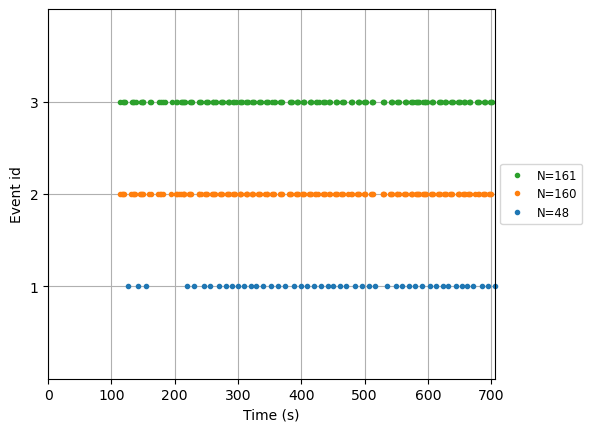

In [18]:
fig = mne.viz.plot_events(
    events, sfreq=raw.info["sfreq"], first_samp=raw.first_samp, event_id = 
)

# 4. Crear épocas

Vamos a crear las épocas que nos interesan para TOL. Esto  lo vamos a hacer a partir de la marca con el numero 1 ("start"). Por eso, vamos a crear un objeto que incluya solo a este tipo de marcas. Luego, vamos a mirar las primeras 5

In [11]:
start_event = mne.pick_events(events, include=1)

print(start_event[:5])  # show the first 5


NameError: name 'count' is not defined

In [ ]:


epochs = mne.Epochs(raw, start_event, tmin=-0.5, tmax=1)

print(epochs)

epochs.save("epochs_TOL_SAAV0009.fif", overwrite=True)

## 5. Guardar datos filtrados

In [78]:
raw_filtered.save(("../data/" + task + "/preprocessing/" + subject_id + "_" + task +"_REF_FILT.fif"), overwrite=True)

Overwriting existing file.
Writing e:\Procesamiento EEG\scripts\..\data\TOL\preprocessing\SAAV0009_TOL_REF_FILT.fif


C:\Users\slipina\AppData\Local\Temp\ipykernel_5784\1793239165.py:1: RuntimeWarning: This filename (e:\Procesamiento EEG\scripts\..\data\TOL\preprocessing\SAAV0009_TOL_REF_FILT.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_filtered.save(("../data/" + task + "/preprocessing/" + subject_id + "_" + task +"_REF_FILT.fif"), overwrite=True)


Closing e:\Procesamiento EEG\scripts\..\data\TOL\preprocessing\SAAV0009_TOL_REF_FILT.fif
[done]
